In [ ]:
shutil.rmtree("/content/cemri")

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
import shutil
shutil.unpack_archive("/content/cemri.zip", "/content/cemri/")

In [ ]:
import shutil
shutil.copytree("/content/gdrive/My Drive/cemri/", "/content/cemri/")

'/content/cemri/'

In [ ]:
import glob
import os
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from keras.preprocessing.image import ImageDataGenerator, load_img, img_to_array, array_to_img

In [ ]:
#loading images using load_img

#converting images into array

#putting array images into train_imgs

IMG_DIM = (256, 256)
train_files = glob.glob('/content/cemri/train/*')
train_imgs = [img_to_array(load_img(img, target_size=IMG_DIM)) for img in train_files]
train_imgs = np.array(train_imgs)

#getting labels from the image name
train_labels = [fn.split('/')[-1].split('_')[0]  for fn  in train_files]

validation_files = glob.glob('/content/cemri/test/*')
validation_imgs = [img_to_array(load_img(img, target_size=IMG_DIM)) for img in validation_files]
validation_imgs = np.array(validation_imgs)
validation_labels = [fn.split('/')[-1].split('_')[0]  for fn in validation_files]



In [ ]:
print(len(validation_labels),len(train_labels))

print(validation_imgs.shape)

611 2453
(611, 256, 256, 3)


In [ ]:
#normalizing individual channel in images array

train_imgs_scaled = train_imgs.astype('float32')
validation_imgs_scaled  = validation_imgs.astype('float32')
train_imgs_scaled /= 255.
validation_imgs_scaled /= 255.



In [ ]:
batch_size = 64
epochs = 6
input_shape = (256,256, 3)

In [ ]:
#encoding image labels 

from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
le.fit(train_labels)
train_labels_enc = le.transform(train_labels)
validation_labels_enc = le.transform(validation_labels)

#tranforming labels to catogerical
from keras.utils import to_categorical
train_labels_c = to_categorical(train_labels_enc)
validation_labels_c = to_categorical(validation_labels_enc)

In [ ]:
train_labels_enc

array([0, 2, 0, ..., 1, 0, 0])

In [ ]:
train_labels_c

array([[1., 0., 0.],
       [0., 0., 1.],
       [1., 0., 0.],
       ...,
       [0., 1., 0.],
       [1., 0., 0.],
       [1., 0., 0.]], dtype=float32)

In [ ]:
#building model

from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from keras.models import Sequential
from keras import optimizers
import tensorflow as tf

model = Sequential()

model.add(Conv2D(16, kernel_size=(3, 3), activation='relu',
                 input_shape=input_shape))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(64, kernel_size=(3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(128, kernel_size=(3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(256, kernel_size=(3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Flatten())
model.add(Dense(512, activation=tf.nn.relu))
model.add(Dense(3, activation=tf.nn.softmax))

opt = optimizers.Adam(learning_rate = 0.001) 
model.compile(loss='binary_crossentropy',
              optimizer=opt,
              metrics=['accuracy'])

model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 254, 254, 16)      448       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 127, 127, 16)      0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 125, 125, 64)      9280      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 62, 62, 64)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 60, 60, 128)       73856     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 30, 30, 128)       0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 28, 28, 256)      

In [ ]:
#training model

history = model.fit(x=train_imgs_scaled, y=train_labels_c,
                    validation_data=(validation_imgs_scaled, validation_labels_c),
                    batch_size=batch_size,
                    epochs=epochs,
                    verbose=1)
#model.save("cnn"+str(epochs)+"_aft_aug.h5")learning_rate=0.1

Train on 2453 samples, validate on 611 samples
Epoch 1/6
2453/2453 [==============================] - 261s 106ms/step - loss: 0.5008 - accuracy: 0.7490 - val_loss: 0.3910 - val_accuracy: 0.7905
Epoch 2/6
2453/2453 [==============================] - 259s 106ms/step - loss: 0.3478 - accuracy: 0.8358 - val_loss: 0.2691 - val_accuracy: 0.8734
Epoch 3/6
2453/2453 [==============================] - 257s 105ms/step - loss: 0.2628 - accuracy: 0.8867 - val_loss: 0.2154 - val_accuracy: 0.8991
Epoch 4/6
2453/2453 [==============================] - 259s 106ms/step - loss: 0.1972 - accuracy: 0.9143 - val_loss: 0.2231 - val_accuracy: 0.9045
Epoch 5/6
2453/2453 [==============================] - 260s 106ms/step - loss: 0.1418 - accuracy: 0.9424 - val_loss: 0.1776 - val_accuracy: 0.9220
Epoch 6/6
2453/2453 [==============================] - 259s 105ms/step - loss: 0.0789 - accuracy: 0.9723 - val_loss: 0.1065 - val_accuracy: 0.9564


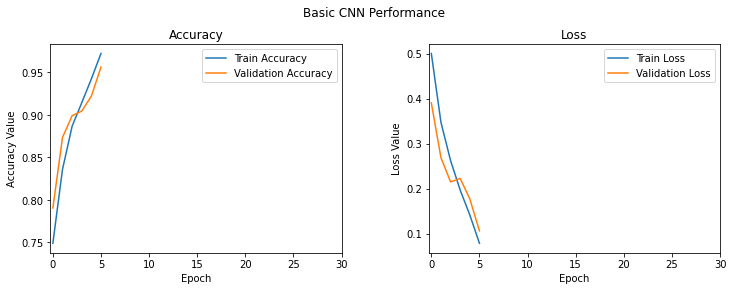

In [ ]:
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 4))
t = f.suptitle('Basic CNN Performance', fontsize=12)
f.subplots_adjust(top=0.85, wspace=0.3)

epoch_list = list(range(epochs))
ax1.plot(epoch_list, history.history['accuracy'], label='Train Accuracy')
ax1.plot(epoch_list, history.history['val_accuracy'], label='Validation Accuracy')
ax1.set_xticks(np.arange(0, 31, 5))
ax1.set_ylabel('Accuracy Value')
ax1.set_xlabel('Epoch')
ax1.set_title('Accuracy')
l1 = ax1.legend(loc="best")

ax2.plot(epoch_list, history.history['loss'], label='Train Loss')
ax2.plot(epoch_list, history.history['val_loss'], label='Validation Loss')
ax2.set_xticks(np.arange(0, 31, 5))
ax2.set_ylabel('Loss Value')
ax2.set_xlabel('Epoch')
ax2.set_title('Loss')
l2 = ax2.legend(loc="best")
plt.savefig('cnn'+str(epochs)+'_aft_aug.png')

In [ ]:
accu = history.history
training_accu = np.mean(accu['accuracy'])
validation_accu = np.mean(accu['val_accuracy'])
print(training_accu, validation_accu)

0.88340807 0.8909802337487539


In [ ]:


#model= tf.keras.models.load_model('/content/cnn7_aft_aug.h5')
y = model.predict(validation_imgs_scaled)
#print(y)
x = ['glioma', 'meningioma', 'pituitary']
c = []
count,total = 0,0
for i in range(len(y)):
    v = np.argmax(y[i])
    c.append(x[int(v)])
p = [[0,0,0],[0,0,0],[0,0,0]]
for i in range(len(y)):
    total += 1
    if c[i] == validation_labels[i]:count += 1
    print("predicted:", c[i],", real_names:",validation_labels[i])
    for j in range(len(x)):

        for k in range(len(x)):
            if x[j] == c[i] and x[k] == validation_labels[i]: p[k][j] += 1
print(p)

predicted: glioma , real_names: glioma
predicted: pituitary , real_names: glioma
predicted: glioma , real_names: glioma
predicted: pituitary , real_names: pituitary
predicted: meningioma , real_names: meningioma
predicted: glioma , real_names: glioma
predicted: meningioma , real_names: meningioma
predicted: glioma , real_names: glioma
predicted: glioma , real_names: glioma
predicted: pituitary , real_names: pituitary
predicted: glioma , real_names: glioma
predicted: meningioma , real_names: meningioma
predicted: meningioma , real_names: meningioma
predicted: glioma , real_names: glioma
predicted: glioma , real_names: glioma
predicted: pituitary , real_names: pituitary
predicted: pituitary , real_names: pituitary
predicted: pituitary , real_names: pituitary
predicted: meningioma , real_names: glioma
predicted: glioma , real_names: glioma
predicted: glioma , real_names: glioma
predicted: glioma , real_names: glioma
predicted: pituitary , real_names: pituitary
predicted: pituitary , real_

In [ ]:
loss, acc = model.evaluate(validation_imgs_scaled,  validation_labels_c, verbose=2)
print('Restored model, accuracy: {:5.2f}%'.format(100*acc))
print("correctly recognized images=",count,'/',total)    

Restored model, accuracy: 95.64%
correctly recognized images= 571 / 611


/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


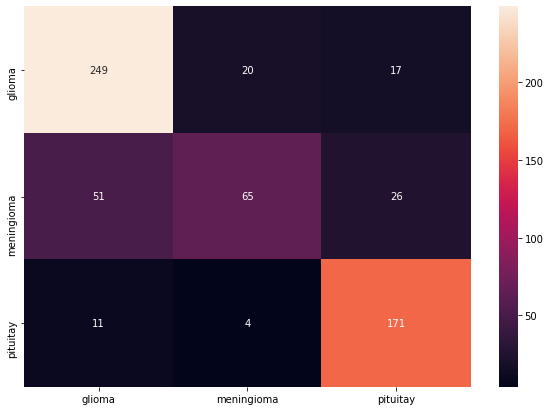

In [ ]:
import seaborn as sn
import pandas as pd
import matplotlib.pyplot as plt
array = p
df_cm = pd.DataFrame(array, index = [i for i in ['glioma','meningioma','pituitay']],
                  columns = [i for i in ['glioma','meningioma','pituitay']])
plt.figure(figsize = (10,7))
sn.heatmap(df_cm, annot=True, fmt="d")

In [ ]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(validation_labels, c)
print(cm)

[[249  20  17]
 [ 51  65  26]
 [ 11   4 171]]


In [ ]:
from sklearn.metrics import classification_report
print(classification_report(validation_labels, c))

              precision    recall  f1-score   support

      glioma       0.80      0.87      0.83       286
  meningioma       0.73      0.46      0.56       142
   pituitary       0.80      0.92      0.85       186

    accuracy                           0.79       614
   macro avg       0.78      0.75      0.75       614
weighted avg       0.78      0.79      0.78       614

